In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

In [2]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [9]:
class MyLinearRegression:
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases)
        self.w = torch.tensor([1], dtype=torch.float,requires_grad=True)
        self.b = torch.tensor([0],dtype=torch.float,requires_grad=True)
    
    def forward(self, x):
        # TODO: implement forward computation - compute predictions based on the inputs
        return self.w * x + self.b
    
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w, self.b]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    return sum((pred - y)**2)/len(y)

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype=np.float32)
torch_inputs = torch.from_numpy(numpy_inputs)
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

Testing model: an input of [0. 1. 2.] gives a prediction:
 tensor([0., 1., 2.], grad_fn=<AddBackward0>)


In [10]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):
    x_torch = torch.from_numpy(features)
    y_torch = torch.from_numpy(labels)
    for epoch in range(num_epoch):
        
        # TODO: Step 1 - create torch variables corresponding to features and labels

        # TODO: Step 2 - compute model predictions and loss
        pred = model.forward(x_torch)
        loss = lossfunc(pred,y_torch)
        
        # TODO: Step 3 - do a backward pass and a gradient update step
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step() 
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(torch.from_numpy(x_train)).data.numpy()
    order = np.argsort(x_train, axis=0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 17.1957
Epoch [11/50], Loss: 3.0396
Epoch [21/50], Loss: 0.7159
Epoch [31/50], Loss: 0.3341
Epoch [41/50], Loss: 0.2711


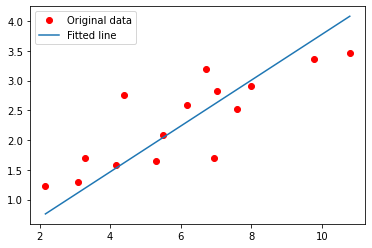

In [11]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 257.9351
Epoch [11/100], Loss: 3.8079
Epoch [21/100], Loss: 3.7132
Epoch [31/100], Loss: 3.6256
Epoch [41/100], Loss: 3.5445
Epoch [51/100], Loss: 3.4694
Epoch [61/100], Loss: 3.3999
Epoch [71/100], Loss: 3.3355
Epoch [81/100], Loss: 3.2760
Epoch [91/100], Loss: 3.2208


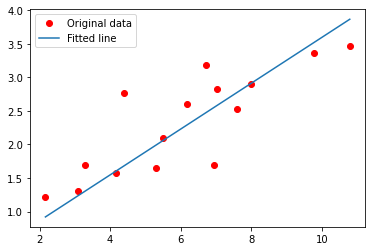

In [14]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.w = torch.tensor([1], dtype=torch.float,requires_grad=True)
        self.b = torch.tensor([0],dtype=torch.float,requires_grad=True)
    
    def forward(self, x):
                # TODO: implement forward computation

        return self.w * x + self.b
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w, self.b]
        
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = torch.nn.MSELoss(reduction='sum')

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=100)
visualize(x_train, y_train, model)

## MLP

In [26]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        self.w = torch.randn(hidden_size, dtype=torch.float, requires_grad=True)
        self.b = torch.randn(hidden_size, dtype=torch.float, requires_grad=True)
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
    
    def forward(self, x):
        result = self.w[0] * x + self.b[0]
        for i in range (1, hidden_size):
            result = nn.ReLU(self.w[i] * result + self.b[i])
     #   result=nn.Sigmoid(result)
        return result
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.w, self.b]
       
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 2
learning_rate = 1e-3

model = MLP(hidden_size=hidden_size)

optimizer = torch.optim.SGD(model.parameters(), learning_rate)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=300)
visualize(x_train, y_train, model)

ModuleAttributeError: 'ReLU' object has no attribute 'size'